For a plane wave traveling in the direction of the positive z-axis with the phase of the wave chosen so that the wave maximum is at the origin at $t=0$ the electric and magnetic fields obey the equations:

$$E_x(z,t)=E_0cos(kz-\omega t)=\frac{1}{2}E_0e^{i(kz-\omega t)}+c.c.$$
$$B_y(z,t)=B_0cos(kz-\omega t)=\frac{1}{2}B_0e^{i(kz-\omega t)}+c.c.$$

Energy density for E-field:

$$u(z,t) = u_E + u_B = \frac{1}{2}\epsilon_0E^2 + \frac{1}{2\mu_0}B^2 \quad[Jm^{-3}]$$
$E=cB=\frac{1}{\sqrt{\epsilon_0\mu_0}}B$ therefore, $u_E=u_B$ and:

$$u(z,t) = \epsilon_0E^2\quad[Jm^{-3}]$$

The energy per unit area per unit time passing through a plane perpendicular to the wave, called the energy flux and denoted by $S$ can be calculated by dividing the energy by the area $A$ and the time interval $\Delta t$.

$$S=\frac{(Ac\Delta t)\epsilon_0E^2}{A\Delta t}=\epsilon_0cE^2\quad[Wm^{-2}]$$

More generally, the flux of energy through any surface also depends on the orientation of the surface. To take the direction into account, we introduce a vector $\vec{S}$,called the Poynting vector, with the following definition:

$$\vec{S}=\frac{1}{\mu_0}\vec{E}\times\vec{B}$$

The energy flux at any place also varies in time:

$$S(t)=c\epsilon_0E_0^2cos^2(kz-\omega t)$$

For fields in matter other than free space:

$$S(t)=\frac{c}{n}\epsilon E_0^2cos^2(kz-\omega t)=\frac{c}{n}n^2\epsilon_0 E_0^2cos^2(kz-\omega t)$$
$$S(t)=cn\epsilon_0 E_0^2cos^2(kz-\omega t)$$

Because the frequency of visible light is very high, of the order of $10^{14}$ Hz the energy flux for visible light through any area is an extremely rapidly varying quantity. Most measuring devices, including our eyes, detect only an average over many cycles. The time average of the energy flux is the intensity $I$ of the electromagnetic wave and is the power per unit area. It can be expressed by averaging the cosine function in above equation over one complete cycle, which is the same as time-averaging over many cycles (here, $T$ is one period):

$$I=S_{avg}=c\epsilon_0E_0^2\frac{1}{T}\int_{0}^{T}cos^2\left(\frac{2\pi t}{T}\right)dt=\frac{1}{2}c\epsilon_0E_0^2$$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c,eps0,T,t,z,x,y,w0,k,om,E0,tau = sp.symbols('c epsilon_0 T t z x y w_0 k omega E_0 tau',real=True, positive=True)
sp.integrate(sp.cos(2*sp.pi*t/T)**2,(t,0,T))/T

1/2

In [3]:
A = sp.exp(-2*sp.log(2)*t**2/tau**2)*sp.exp(-(x**2+y**2)/w0**2)
A_f = sp.lambdify([x,y,t,w0,tau],A)
A

exp((-x**2 - y**2)/w_0**2)*exp(-2*t**2*log(2)/tau**2)

In [4]:
#what is the % intensity amplitude at x=w0, y=0?
(A**2).subs({x:w0,y:0})/(A**2).subs({x:0,y:0})

exp(-2)

In [5]:
#at r=1/e^2, the intensity % is?
100/np.e**2

13.53352832366127

(0.0, 1.0, 0.0, 1.0)

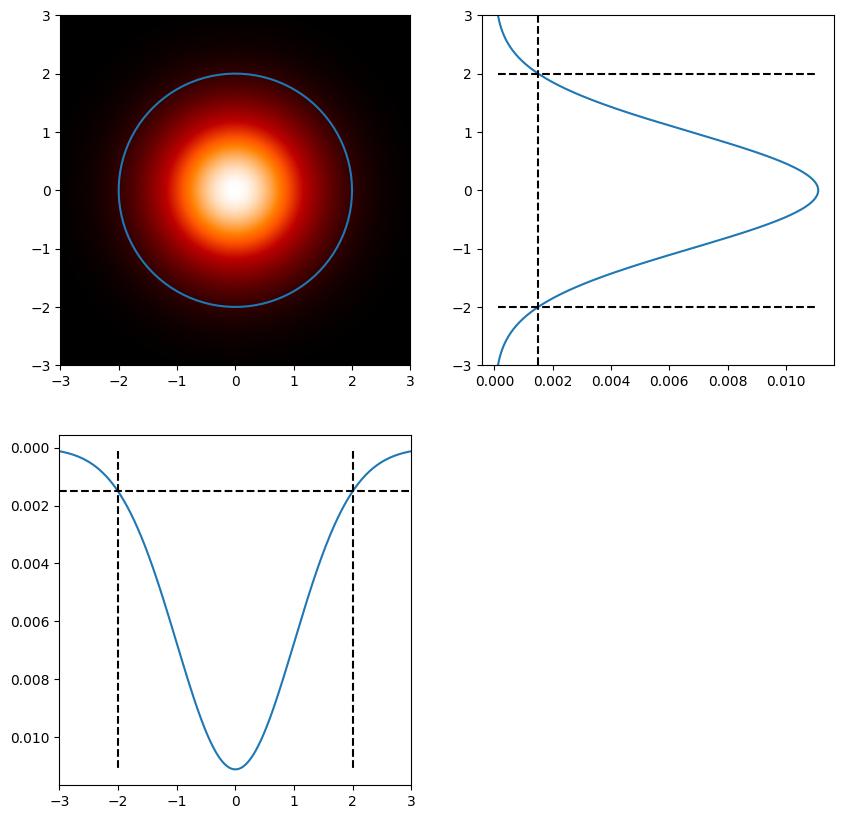

In [6]:
x_arr = np.linspace(-3e-3,3e-3,500)
y_arr = np.linspace(-3e-3,3e-3,500)
X,Y = np.meshgrid(x_arr,y_arr)
t_val = 0
w0_val = 2e-3
tau_val = 100e-15
conv_fac = 1e3
I = A_f(X,Y,t_val,w0_val,tau_val)**2
fig,axs=plt.subplots(2,2,figsize=(10,10))
axs[0,0].imshow(I,extent=[np.min(x_arr*conv_fac),np.max(x_arr*conv_fac),np.min(y_arr*conv_fac),np.max(y_arr*conv_fac)],cmap='gist_heat', origin='lower', aspect='equal')
the = np.linspace(0,2*np.pi,100)
axs[0,0].plot(w0_val*conv_fac*np.cos(the),w0_val*conv_fac*np.sin(the))
axs[1,0].plot(x_arr*conv_fac,I[0,:])
axs[1,0].set_xlim([np.min(y_arr*conv_fac),np.max(y_arr*conv_fac)])
axs[1,0].vlines([-w0_val*conv_fac,w0_val*conv_fac],np.min(I[0,:]),np.max(I[0,:]), color='k', linestyle='--')
axs[1,0].hlines(np.max(I[0,:])/np.e**2,np.min(y_arr*conv_fac),np.max(y_arr*conv_fac), color='k', linestyle='--')
axs[1,0].invert_yaxis()
axs[0,1].plot(I[:,0],y_arr*conv_fac)
axs[0,1].set_ylim([np.min(x_arr*conv_fac),np.max(x_arr*conv_fac)])
axs[0,1].hlines([-w0_val*conv_fac,w0_val*conv_fac],np.min(I[:,0]),np.max(I[:,0]), color='k', linestyle='--')
axs[0,1].vlines(np.max(I[:,0])/np.e**2,np.min(x_arr*conv_fac),np.max(x_arr*conv_fac), color='k', linestyle='--')
axs[1,1].axis('off')


In [7]:
np.e

2.718281828459045